### Easy Problem Statement: Predict if a Student Passes or Fails Based on Hours Studied

#### Problem Overview:
In this task, you will build a logistic regression model to predict if a student will pass or fail based on the number of hours studied. The dataset contains two columns: "Hours Studied" (numeric) and "Pass/Fail" (binary: 1 for pass, 0 for fail).

| Hours Studied | Pass/Fail |
|---------------|-----------|
| 1             | 0         |
| 2             | 0         |
| 3             | 0         |
| 4             | 0         |
| 5             | 1         |
| 6             | 1         |
| 7             | 1         |
| 8             | 1         |
| 9             | 1         |
| 10            | 1         |

---

#### Tasks to be Done:

1. **Data Collection and Preprocessing:**
   - Load the dataset with "Hours Studied" and "Pass/Fail" columns.
   - Ensure no missing data (drop or fill missing values).
   - Visualize the data to examine the relationship between hours studied and the outcome (pass/fail).

2. **Implement Logistic Regression:**
   - **Sigmoid Function:** Write the sigmoid function:
     $$ f_w,_b(x) = \frac{1}{1 + e^{-(w.x+b)}} $$  
     where \(x\) is the feature (hours studied) and \(w\) and \(b\) are the model parameters.
   - **Cost Function:** Implement the cost function:
     $$ J(w,b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(f_w,_b(x^{(i)})) - (1 - y^{(i)}) \log(1 - f_w,_b(x^{(i)})) \right] $$

3. **Gradient Descent:**
   - Implement gradient descent to minimize the cost function and optimize the parameters \(w\).
   - Use the update rule:
     $$ w_j := w_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_w,_b(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

4. **Model Training:**
   - Train the logistic regression model using gradient descent to find optimal w and b.

5. **Make Predictions:**
   - Use the trained model to predict whether a student with a given number of study hours will pass or fail.

6. **Evaluate Model Performance:**
   - Evaluate accuracy (percentage of correct predictions).
   - Optionally, use a confusion matrix to assess performance.

7. **Visualization:**
   - Plot the decision boundary that separates the two classes (pass/fail) using the sigmoid function with a threshold of 0.5.


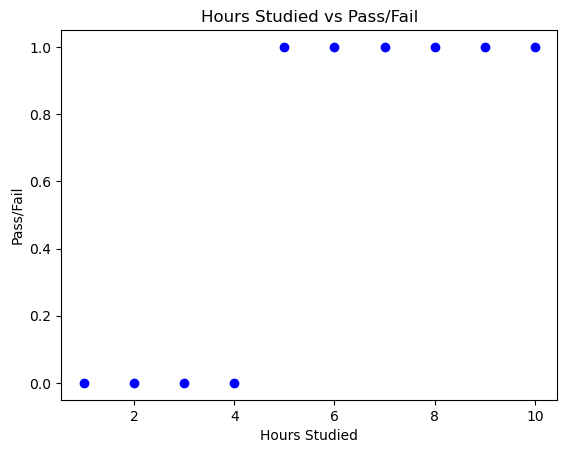

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Creating the dataset
data = {'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Pass/Fail': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]}
df = pd.DataFrame(data)

# Visualizing the data
plt.scatter(df['Hours Studied'], df['Pass/Fail'], color='blue')
plt.title("Hours Studied vs Pass/Fail")
plt.xlabel("Hours Studied")
plt.ylabel("Pass/Fail")
plt.show()


In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
def cost_function(w, b, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, w) + b)
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost


In [18]:
def gradient_descent(w, b, X, y, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, w) + b)
        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b


In [20]:
# Prepare the data
X = df['Hours Studied'].values.reshape(-1, 1)  # Feature (Hours Studied)
y = df['Pass/Fail'].values  # Labels (Pass/Fail)

# Initial parameters
w_init = np.zeros(X.shape[1])  # Weight initialization
b_init = 0  # Bias initialization
learning_rate = 0.1
iterations = 1000

# Train the model
w, b = gradient_descent(w_init, b_init, X, y, learning_rate, iterations)
print(f"Optimized weights: {w}, Optimized bias: {b}")


Optimized weights: [1.22918733], Optimized bias: -5.230062614614006


In [22]:
def predict(w, b, X):
    return sigmoid(np.dot(X, w) + b)

# Predict for a student who studied for 5 hours
predicted_prob = predict(w, b, np.array([[5]]))
print(f"Probability of passing for 5 hours of study: {predicted_prob[0]}")


Probability of passing for 5 hours of study: 0.7142006675693313


In [24]:
predictions = predict(w, b, X) >= 0.5  # Classify as 1 if probability > 0.5, else 0
accuracy = np.mean(predictions == y)  # Calculate accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


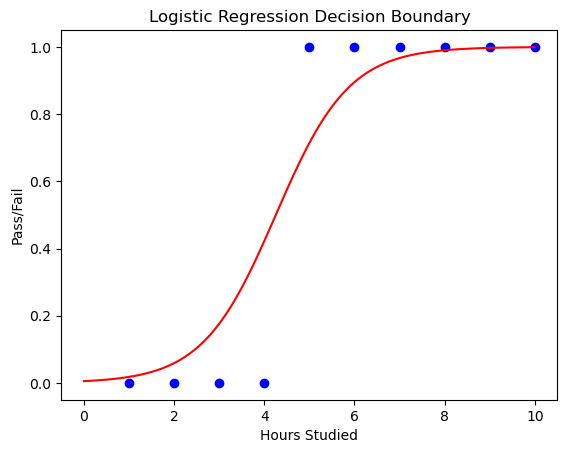

In [28]:
# Plotting the decision boundary
plt.scatter(df['Hours Studied'], df['Pass/Fail'], color='blue')
x_values = np.linspace(0, 10, 100)
y_values = sigmoid(w * x_values + b)  # Calculate sigmoid values
plt.plot(x_values, y_values, color='red')  # Plot the decision boundary
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Hours Studied")
plt.ylabel("Pass/Fail")
plt.show()


### Moderate Problem Statement:

#### **Customer Churn Prediction Using Logistic Regression and Regularization**

This project involves building a logistic regression model to predict whether a telecom customer will churn, using features like customer demographics, usage patterns, and service interactions. The model will be regularized to prevent overfitting.

---

### Tasks to be Done:

1. **Data Collection and Preprocessing**:
   - Load the dataset with features like "Age", "Usage", "Service Calls", and "Churn".
   - Handle missing data and scale the features for gradient descent.
   - Convert categorical features to numeric using encoding methods.

2. **Data Exploration**:
   - Visualize data relationships to understand feature influence on churn.

3. **Logistic Regression**:
   - Implement the sigmoid function for probability prediction.
   - Define the logistic regression model and compute the cost function.

4. **Regularization**:
   - Add a regularization term to the cost function to avoid overfitting.

5. **Gradient Descent**:
   - Apply gradient descent to minimize the regularized cost function and optimize model parameters.

6. **Model Training**:
   - Train the model using customer data and find the optimal parameters.

7. **Prediction and Evaluation**:
   - Predict churn for new customers and evaluate model performance using accuracy, precision, recall, F1-score, and confusion matrix.

8. **Hyperparameter Tuning**:
   - Tune regularization strength and experiment with cross-validation to improve model performance.

9. **Visualization**:
   - Plot the decision boundary and observe how the model classifies churn based on features.

---

### Example Dataset:

| **Customer ID** | **Age** | **Usage (min/month)** | **Service Calls (per month)** | **Contract Type** | **Churn** |
|-----------------|---------|-----------------------|------------------------------|-------------------|-----------|
| 1               | 35      | 250                   | 3                            | Monthly           | 0         |
| 2               | 42      | 300                   | 5                            | Yearly            | 1         |
| 3               | 28      | 180                   | 1                            | Monthly           | 0         |
| 4               | 50      | 500                   | 8                            | Yearly            | 1         |
| 5               | 29      | 220                   | 2                            | Monthly           | 0         |
| 6               | 34      | 320                   | 4                            | Monthly           | 1         |
| 7               | 45      | 450                   | 6                            | Yearly            | 0         |
| 8               | 33      | 200                   | 1                            | Monthly           | 1         |
| 9               | 41      | 400                   | 7                            | Yearly            | 1         |
| 10              | 38      | 150                   | 2                            | Monthly           | 0         |

---

### Columns:
- **Customer ID**: A unique identifier for each customer.
- **Age**: The age of the customer.
- **Usage (min/month)**: The number of minutes the customer uses in a month.
- **Service Calls (per month)**: The number of calls the customer made to customer service each month.
- **Contract Type**: Whether the customer is on a "Monthly" or "Yearly" contract.
- **Churn**: Target variable (1 if the customer churned, 0 if they stayed).

Accuracy: 70.00%


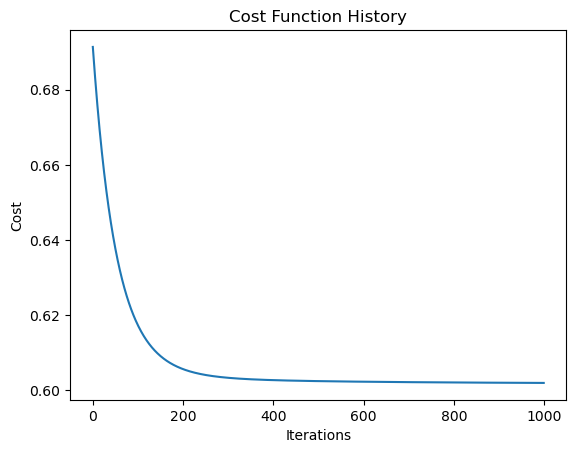

In [36]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Example Dataset (can be replaced with your actual dataset)
data = {
    'Age': [35, 42, 28, 50, 29, 34, 45, 33, 41, 38],
    'Usage': [250, 300, 180, 500, 220, 320, 450, 200, 400, 150],
    'Service Calls': [3, 5, 1, 8, 2, 4, 6, 1, 7, 2],
    'Contract Type': ['Monthly', 'Yearly', 'Monthly', 'Yearly', 'Monthly', 'Monthly', 'Yearly', 'Monthly', 'Yearly', 'Monthly'],
    'Churn': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Data Preprocessing
# Convert 'Contract Type' to numeric (0: Monthly, 1: Yearly)
df['Contract Type'] = df['Contract Type'].map({'Monthly': 0, 'Yearly': 1})

# Split data into features (X) and target (y)
X = df[['Age', 'Usage', 'Service Calls', 'Contract Type']].values
y = df['Churn'].values

# Step 3: Feature Scaling (Normalize Features)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a bias term (column of ones) to X
X = np.c_[np.ones((X.shape[0], 1)), X]

# Step 4: Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 5: Cost Function with Regularization
def cost_function_reg(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) / m
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))  # Regularization term
    return cost + reg_term

# Step 6: Gradient Descent with Regularization
def gradient_descent_reg(X, y, theta, alpha, lambda_, iterations):
    m = len(y)
    J_history = []
    
    for _ in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (X.T.dot(h - y) + lambda_ * np.concatenate(([0], theta[1:]))) / m
        theta -= alpha * gradient
        J_history.append(cost_function_reg(theta, X, y, lambda_))
        
    return theta, J_history

# Step 7: Initialize Parameters and Hyperparameters
theta_initial = np.zeros(X.shape[1])
alpha = 0.01  # Learning rate
lambda_ = 1   # Regularization parameter
iterations = 1000

# Step 8: Train the Model
theta_optimal, J_history = gradient_descent_reg(X, y, theta_initial, alpha, lambda_, iterations)

# Step 9: Predictions
def predict(X, theta):
    return (sigmoid(X.dot(theta)) >= 0.5).astype(int)

# Make predictions on the same dataset
y_pred = predict(X, theta_optimal)

# Step 10: Model Evaluation (Accuracy)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 11: Plot the Cost Function History (Optional)
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()
